# classification project
GD 노드 4

프로세스는 다음과 같다.
1. 데이터 로드
2. 데이터 전처리
3. 머신러닝 모델 사용
4. 딥러닝 모델 사용
5. 비교 분석

## 1. 데이터 로드
단어 수를 각각 10000, 5000, 2500 으로 하여 데이터를 로드한다.

In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산
from tensorflow import keras

Duplicate key in file PosixPath('/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'), line 250 ('font.family:  NanumGothic')


In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)
(x_train_2, y_train_2), (x_test_2, y_test_2) = reuters.load_data(num_words=5000, test_split=0.2)
(x_train_3, y_train_3), (x_test_3, y_test_3) = reuters.load_data(num_words=2500, test_split=0.2)

/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


### 데이터 확인
훈련 데이터는 8982, 테스트 데이터는 2246개이고,   
클래수의 수는 46개이며, 데이터의 길이는 평균 145 정도이다.

In [3]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [4]:
print(x_train[0])
print(x_test[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [5]:
print(y_train[0])
print(y_test[0])

3
3


In [6]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


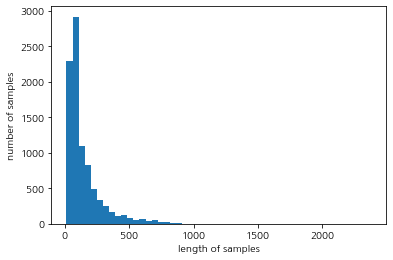

In [7]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

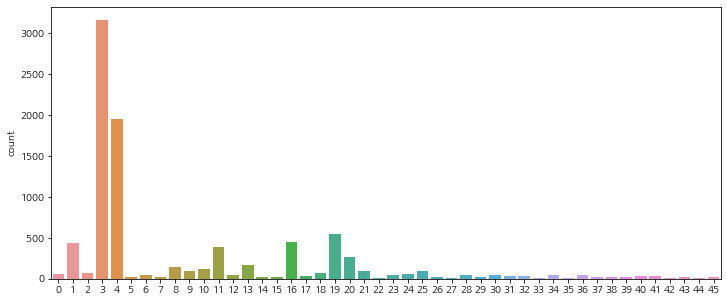

In [8]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)

In [9]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


## 2. 데이터 전처리
자연어를 처리하기 위해서 BoW 방식을 사용할 것이고    
이를 위해서 DTM을 만들고 tfidf를 적용할 것이다.

### 사전 구축 

In [10]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [11]:
index_to_word = {index + 3 : word for word, index in word_index.items()}

In [12]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

In [13]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [14]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

In [15]:
decoded = []
for i in range(len(x_train_2)):
    t = ' '.join([index_to_word[index] for index in x_train_2[i]])
    decoded.append(t)

x_train_2 = decoded

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test_2[i]])
    decoded.append(t)

x_test_2 = decoded

In [16]:
decoded = []
for i in range(len(x_train_2)):
    t = ' '.join([index_to_word[index] for index in x_train_3[i]])
    decoded.append(t)

x_train_3 = decoded

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test_3[i]])
    decoded.append(t)

x_test_3 = decoded

### DTM & TFIDF 

In [17]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


In [18]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


## 3. 머신러닝 모델 사용
TFIDF을 적용한 데이터를 이용하여 8가지 머신러닝 모델에 적용을 한다.   
모델은 다음과 같다.   
나이브 베이즈 분류기, CNB, 로지스틱 회귀, 서포트 벡터 머신, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 트리, 보팅

In [19]:
def tfidf(train, test):
    dtmvector = CountVectorizer()
    train_dtm = dtmvector.fit_transform(train)
    
    tfidf_transformer = TfidfTransformer()
    tfidfv = tfidf_transformer.fit_transform(train_dtm)
    
    test_dtm = dtmvector.transform(test) #테스트 데이터를 DTM으로 변환
    tfidfv_test = tfidf_transformer.transform(test_dtm) #DTM을 TF-IDF 행렬로 변환
    return tfidfv, tfidfv_test

# 나이브 베이즈 분류기, CNB, 로지스틱 회귀, 서포트 벡터 머신, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 트리, 보팅
def pipeline(x_train, y_train, x_test, y_test):
    # tfidf
    (tfidfv, tfidfv_test) = tfidf(x_train,x_test)
    
    # multi_NB
    print('multi_NB')
    mod = MultinomialNB()
    mod.fit(tfidfv, y_train)
    print(classification_report(y_test, mod.predict(tfidfv_test)))
    
    # CN
    print('CNB')
    cb = ComplementNB()
    cb.fit(tfidfv, y_train)
    print(classification_report(y_test, cb.predict(tfidfv_test)))

    # logistic regression
    print('logistic')
    lr = LogisticRegression(C=10000, penalty='l2')
    lr.fit(tfidfv, y_train)
    print(classification_report(y_test, lr.predict(tfidfv_test)))
    
    # SVM
    print('SVM')
    lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
    lsvc.fit(tfidfv, y_train)
    print(classification_report(y_test, lsvc.predict(tfidfv_test)))

    # DT
    print('DT')
    tree = DecisionTreeClassifier(max_depth=10, random_state=0)
    tree.fit(tfidfv, y_train)
    print(classification_report(y_test, tree.predict(tfidfv_test)))

    # RF
    print('RF')
    forest = RandomForestClassifier(n_estimators=5, random_state=0)
    forest.fit(tfidfv, y_train)
    print(classification_report(y_test, forest.predict(tfidfv_test)))
    
    # GRBT
    print('GRBT')
    grbt = GradientBoostingClassifier(random_state=0) # verbose=3
    grbt.fit(tfidfv, y_train)
    print(classification_report(y_test, grbt.predict(tfidfv_test)))

    # voting
    print('voting')
    voting = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
    ], voting='soft', n_jobs=-1)
    voting.fit(tfidfv, y_train)
    print(classification_report(y_test, voting.predict(tfidfv_test)))
    

In [20]:
pipeline(x_train, y_train, x_test, y_test) # voca 10,000

multi_NB
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17      

/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stabl

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.75      0.78      0.76       105
           2       0.74      0.85      0.79        20
           3       0.92      0.93      0.93       813
           4       0.81      0.87      0.84       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.68      0.71      0.69        38
           9       0.81      0.84      0.82        25
          10       0.93      0.87      0.90        30
          11       0.64      0.73      0.68        83
          12       0.57      0.31      0.40        13
          13       0.59      0.59      0.59        37
          14       0.50      0.50      0.50         2
          15       0.67      0.44      0.53         9
          16       0.68      0.75      0.71        99
          17       0.75    

/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.68      0.72      0.70       105
           2       0.78      0.70      0.74        20
           3       0.90      0.92      0.91       813
           4       0.80      0.84      0.82       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       1.00      0.33      0.50         3
           8       0.59      0.71      0.64        38
           9       0.81      0.84      0.82        25
          10       0.89      0.83      0.86        30
          11       0.62      0.70      0.66        83
          12       0.40      0.31      0.35        13
          13       0.60      0.57      0.58        37
          14       0.50      0.50      0.50         2
          15       0.43      0.33      0.38         9
          16       0.67      0.73      0.70        99
          17       0.80    

/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.72      0.42      0.53       105
           2       0.62      0.50      0.56        20
           3       0.93      0.83      0.88       813
           4       0.40      0.90      0.56       474
           5       0.00      0.00      0.00         5
           6       0.90      0.64      0.75        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.88      0.88      0.88        25
          10       0.85      0.77      0.81        30
          11       0.64      0.51      0.56        83
          12       0.14      0.08      0.10        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.59      0.84      0.69        99
          17       0.00    

/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.22      0.33      0.27        12
           1       0.45      0.77      0.57       105
           2       0.30      0.30      0.30        20
           3       0.82      0.90      0.86       813
           4       0.61      0.83      0.70       474
           5       0.00      0.00      0.00         5
           6       0.67      0.43      0.52        14
           7       0.50      0.33      0.40         3
           8       0.67      0.53      0.59        38
           9       0.70      0.28      0.40        25
          10       0.75      0.30      0.43        30
          11       0.55      0.59      0.57        83
          12       0.40      0.15      0.22        13
          13       0.37      0.19      0.25        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.59      0.59      0.59        99
          17       0.00    

In [21]:
pipeline(x_train_2, y_train_2, x_test_2, y_test_2) # voca 5,000

multi_NB
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.50      0.80      0.62       105
           2       0.00      0.00      0.00        20
           3       0.86      0.89      0.87       813
           4       0.59      0.95      0.73       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.28      0.44        25
          10       0.00      0.00      0.00        30
          11       0.48      0.73      0.58        83
          12       0.00      0.00      0.00        13
          13       1.00      0.14      0.24        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.60      0.66      0.62        99
          17      

/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stabl

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.77      0.80      0.79       105
           2       0.74      0.85      0.79        20
           3       0.91      0.93      0.92       813
           4       0.81      0.87      0.84       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.64      0.74      0.68        38
           9       0.81      0.88      0.85        25
          10       0.93      0.87      0.90        30
          11       0.64      0.73      0.68        83
          12       0.57      0.31      0.40        13
          13       0.64      0.62      0.63        37
          14       0.50      0.50      0.50         2
          15       0.83      0.56      0.67         9
          16       0.67      0.73      0.70        99
          17       0.82    

/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.72      0.72      0.72       105
           2       0.60      0.75      0.67        20
           3       0.90      0.90      0.90       813
           4       0.81      0.84      0.82       474
           5       0.00      0.00      0.00         5
           6       0.86      0.86      0.86        14
           7       1.00      0.33      0.50         3
           8       0.61      0.66      0.63        38
           9       0.77      0.80      0.78        25
          10       0.77      0.80      0.79        30
          11       0.64      0.73      0.69        83
          12       0.40      0.31      0.35        13
          13       0.59      0.54      0.56        37
          14       1.00      0.50      0.67         2
          15       0.50      0.44      0.47         9
          16       0.66      0.70      0.68        99
          17       0.60    

/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.72      0.40      0.52       105
           2       0.60      0.45      0.51        20
           3       0.94      0.84      0.89       813
           4       0.39      0.91      0.55       474
           5       0.00      0.00      0.00         5
           6       1.00      0.57      0.73        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.88      0.88      0.88        25
          10       0.87      0.87      0.87        30
          11       0.62      0.48      0.54        83
          12       0.17      0.08      0.11        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.60      0.82      0.69        99
          17       0.00    

/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.28      0.42      0.33        12
           1       0.42      0.78      0.55       105
           2       0.44      0.35      0.39        20
           3       0.84      0.90      0.87       813
           4       0.68      0.84      0.75       474
           5       0.00      0.00      0.00         5
           6       0.86      0.43      0.57        14
           7       1.00      0.33      0.50         3
           8       0.59      0.53      0.56        38
           9       0.71      0.40      0.51        25
          10       0.89      0.53      0.67        30
          11       0.57      0.69      0.62        83
          12       0.33      0.15      0.21        13
          13       0.46      0.32      0.38        37
          14       0.00      0.00      0.00         2
          15       1.00      0.11      0.20         9
          16       0.70      0.67      0.68        99
          17       0.00    

In [22]:
pipeline(x_train_3, y_train_3, x_test_3, y_test_3) # voca 2,500

multi_NB
              precision    recall  f1-score   support

           0       1.00      0.25      0.40        12
           1       0.48      0.81      0.60       105
           2       0.00      0.00      0.00        20
           3       0.89      0.87      0.88       813
           4       0.63      0.94      0.76       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.75      0.08      0.14        38
           9       1.00      0.52      0.68        25
          10       1.00      0.13      0.24        30
          11       0.44      0.77      0.56        83
          12       0.00      0.00      0.00        13
          13       0.75      0.16      0.27        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.54      0.77      0.63        99
          17      

/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stabl

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.74      0.74      0.74       105
           2       0.67      0.80      0.73        20
           3       0.89      0.92      0.91       813
           4       0.78      0.84      0.81       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.33      0.50         3
           8       0.63      0.68      0.66        38
           9       0.81      0.84      0.82        25
          10       0.89      0.83      0.86        30
          11       0.61      0.69      0.65        83
          12       0.57      0.31      0.40        13
          13       0.60      0.68      0.63        37
          14       0.50      0.50      0.50         2
          15       0.80      0.44      0.57         9
          16       0.67      0.70      0.68        99
          17       0.80    

/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.65      0.65      0.65       105
           2       0.75      0.75      0.75        20
           3       0.88      0.88      0.88       813
           4       0.77      0.80      0.79       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       1.00      0.33      0.50         3
           8       0.59      0.63      0.61        38
           9       0.80      0.80      0.80        25
          10       0.89      0.80      0.84        30
          11       0.59      0.66      0.62        83
          12       0.33      0.23      0.27        13
          13       0.53      0.49      0.51        37
          14       0.50      0.50      0.50         2
          15       0.60      0.33      0.43         9
          16       0.58      0.64      0.61        99
          17       1.00    

/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.74      0.40      0.52       105
           2       0.62      0.40      0.48        20
           3       0.94      0.85      0.89       813
           4       0.41      0.91      0.56       474
           5       0.00      0.00      0.00         5
           6       1.00      0.64      0.78        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.87      0.80      0.83        25
          10       0.90      0.87      0.88        30
          11       0.56      0.58      0.57        83
          12       0.14      0.08      0.10        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.60      0.82      0.70        99
          17       0.00    

/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.33      0.50      0.40        12
           1       0.47      0.83      0.60       105
           2       0.53      0.40      0.46        20
           3       0.84      0.89      0.87       813
           4       0.67      0.84      0.74       474
           5       0.00      0.00      0.00         5
           6       0.67      0.43      0.52        14
           7       1.00      0.33      0.50         3
           8       0.62      0.66      0.64        38
           9       0.67      0.56      0.61        25
          10       0.86      0.63      0.73        30
          11       0.59      0.63      0.61        83
          12       0.29      0.15      0.20        13
          13       0.48      0.41      0.44        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.60      0.59      0.59        99
          17       0.00    

/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 4. 딥러닝 모델 사용
평균적으로 가장 좋았던 어휘 크기가 5,000에 대하여 딥러닝 모델을 적용한다.   
정확한 비교를 위해서 tfidf를 적용한 데이터를 그대로 사용한다.   
모델은 간단하게 denes layer 2개 층(입출력 층 제외)을 쌓은 모델이다.  

In [37]:
from sklearn.neural_network import MLPClassifier

(tfidfv, tfidfv_test) = tfidf(x_train_2,x_test_2)
clf = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(100, 100), random_state=100)
clf.fit(tfidfv, y_train_2)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100, 100), random_state=100)

In [38]:
print(classification_report(y_test_2, clf.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.77      0.70      0.73       105
           2       0.70      0.70      0.70        20
           3       0.91      0.92      0.92       813
           4       0.78      0.88      0.83       474
           5       0.50      0.20      0.29         5
           6       0.92      0.86      0.89        14
           7       1.00      0.33      0.50         3
           8       0.69      0.71      0.70        38
           9       0.76      0.88      0.81        25
          10       0.90      0.87      0.88        30
          11       0.65      0.80      0.72        83
          12       0.38      0.23      0.29        13
          13       0.61      0.59      0.60        37
          14       0.50      0.50      0.50         2
          15       0.67      0.22      0.33         9
          16       0.70      0.72      0.71        99
          17       0.50    

/home/aiffel-dj28/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 5. 비교 분석
어휘 크기에 따른 머신러닝의 성능은 크게 다르지 않았다. 즉, 정확도와 weighted f1 score 기준으로 1% 정도의 차이가 났다.   
10000, 5000, 2500 중에서 5000이 가장 좋은 성능을 보여주고 2500이 가장 낮은 성능을 보여준다. 즉, 어휘 크기가 너무 많거나 적어도 안 좋다고 볼 수 있다.   
가장 좋았던 모델은 앙상블을 사용한 voting 모델로 5,000 크기에서 정확도 82%, f1 score(weighted avg) 81%이다.   
대부분의 모델들은 정확도와 f1 score에서 70% 이상의 성능을 보여줬고, naive bayesion, decision tree와 random forest는 70%에 못 미치는 성능을 보여준다. 아마 앙상블 적용하여 편향적인 과적합을 어느 정도 해결할 수 있어서 앙상블 모델이 가장 좋은 성능을 보여준 것 같다.   
딥러닝의 모델은 어휘의 크기가 5000일 때로 하였고, 성는은 정확도 80%, f1 79%이다. 가장 좋은 모델인 앙상블에 조금 못 미치지만 비슷하다.   
사용한 모델이 dense layer이기 때문에 결국 머신러닝의 stacking 방법을 사용한 앙상블이기 떄문에 비슷한 성능을 보여주는 것 같다. 

## 회고 및 루브릭 평가

### 루브릭 평가 항목
1. 분류 모델의 accuracy가 기준 이상 높게 나왔는가?
	(3가지 단어 개수에 대해 8가지 머신러닝 기법을 적용하여 그중 최적의 솔루션을 도출하였다.)
2. 분류 모델의 F1 score가 기준 이상 높게 나왔는가?
	(Vocabulary size에 따른 각 머신러닝 모델의 성능변화 추이를 살피고, 해당 머신러닝 알고리즘의 특성에 근거해 원인을 분석하였다.)
3. 생성모델의 metric(BLEU 등) 기준 이상 높은 성능이 확인되었는가?
	(동일한 데이터셋과 전처리 조건으로 딥러닝 모델의 성능과 비교하여 결과에 따른 원인을 분석하였다.)

### 평가 항목에 대한 수행
1. 3가지 단어 개수에 대해 8가지 머신러닝 기법을 적용하였고 그 중 앙상블 방법 중 voting이 가장 좋았다.
2. vocabulary size에 따른 모델의 성능을 비교한 결과 중간 정도가 가장 좋고 너무 적거나 많아도 안 좋은 성능을 보여줌을 나타냈고, 앙상블 모델의 특성을 설명하여 가장 좋은 모델임을 보였다.
3. 동일한 데이터셋과 전처리 조건으로 딥러닝 모델의 성능과 비교했고, 그에 따른 원인을 분석했다.

### 회고

노션에 공지된 꼭 포함이 되어야 할 점
- 이번 프로젝트에서 **어려웠던 점,**
- 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**.
- 루브릭 평가 지표를 맞추기 위해 **시도한 것들**.
- 만약에 루브릭 평가 관련 지표를 **달성 하지 못했을 때, 이유에 관한 추정**.
- **자기 다짐**

---
- **어려웠던 점**    
루브릭 항목에서 기준 이상이란 표현을 사용하는데 어디에도 '기준'이 없어서 혼란스러웠고, 머신러닝 모델을 훈련하는데에 생각보다 오래 걸렸다. 

---
- **알아낸 점**    
sklearn에서 간단하게 mlp을 구현할 수 있도록 API를 제공하는 것을 알 수 있었다.

- **모호한 점**    
단순히 nlp에서 여러 머신러닝 모델을 적용하라고 하는데 이게 nlp 부분이랑 구체적으로 무슨 연관이 있는지는 모르겠다. 내 생각에는 오히려 여러 가지 머신러닝 기법을 배우는 노드인 것 같은 느낌이다. 

---
- **시도한 것들**   
어휘 크기를 10000, 5000, 2500으로 하였고, 8가지 머신러닝 기법과 딥러닝(신경망)을 적용하였다.

---
- **루브릭 평가 관련 지표**   
제 예상에는 모두 달성되었다고 생각한다. 그 이유는 위에 있는 **평가 항목에 대한 수행**에 나와있다.  
- **자기 다짐** 및 **나의 생각들**      
NLP 노드인데 기대 이하의 노드였다. 그냥 단순히 여러 가지 머신러닝을 적용해 보는 것이기 때문에 nlp 관련해서 한 것은 벡터화 밖에 없다.(이것도 새로운 개념은 아니다.) 왜 이게 going deeper nlp 노드에 있는 지 모르겠다. 정말 시간이 아까운 노드이다.   
그리고 노드에서는 RNN이나 1D CNN 등을 적용해보라고 한다. 그런데 전처리가 동일하면 BoW 기반의 DTM을 사용하고 이것은 이미 순서의 정보가 없어서 RNN이나 1D CNN을 사용하는 의미가 없어지는 데 왜 이런 것들을 적용하는 지 이해를 할 수가 없었다.
